In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from enum import Enum
import pandas as pd
from PIL import Image
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
class Modes(Enum):
    train = 1
    test = 2

class ODIR5K(Dataset):
    def __init__(self, mode, augmentations):
        super(ODIR5K, self).__init__()
        self.mode = mode
        self.csv_path = f"/pytorch_fake{self.mode.name}.csv"
        self.csv = pd.read_csv(self.csv_path)
        self.aug = augmentations
    
    def __len__(self):
        return len(self.csv)

    def __getitem__(self, index):
        csv_line = self.csv.iloc[index]
        img_path = csv_line['path']
        label = torch.tensor(int(csv_line['label']))
        
        image = Image.open(img_path).convert("RGB")
        
        if self.aug is not None:
            image = self.aug(image)
        
        return image, label
        

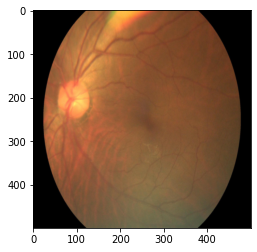

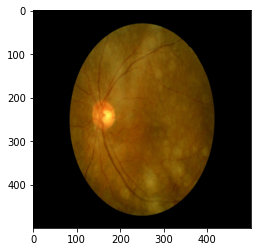

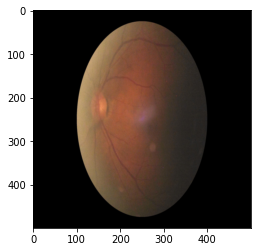

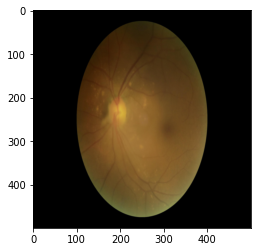

In [6]:
if __name__ == "__main__":
    train_idx, val_idx = train_test_split(list(range(len(odir_train))), test_size=0.20, random_state=42)
    t = transforms.Compose([transforms.Resize((500, 500)),
                            transforms.ToTensor()])
    
    ds = ODIR5K(Modes.train, t, train_idx)
    dl = DataLoader(ds, batch_size = 4, shuffle=True)
    batch = next(iter(dl))
    
    for img in batch['image']:
#         print(b)
        img = np.transpose(img.numpy(), (1, 2, 0))
        plt.figure()
        plt.imshow(img)
        plt.show()